In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from dosipy.utils.viz import fig_config, save_fig

In [2]:
def rpd(x, x_ref):
    """Return relative percentage difference between data and a given
    reference value."""
    return np.abs(x - x_ref) / x_ref * 100

In [26]:
h = [2.5, 5, 10, 50, 150]
f = [6, 26, 60]
A = [4, 4, 1]
sPDn_at6GHz = np.load(os.path.join('data', 'sPDn_at6GHz.npy'))
sPDn_at26GHz = np.load(os.path.join('data', 'sPDn_at26GHz.npy'))
sPDn_at60GHz = np.load(os.path.join('data', 'sPDn_at60GHz.npy'))

sph_rpd_at6GHz = rpd(sPDn_at6GHz[:, 2], sPDn_at6GHz[:, 1])
sph_rpd_at26GHz = rpd(sPDn_at26GHz[:, 2], sPDn_at26GHz[:, 1])
sph_rpd_at60GHz = rpd(sPDn_at60GHz[:, 2], sPDn_at60GHz[:, 1])
cyl_rpd_at6GHz = rpd(sPDn_at6GHz[:, 3], sPDn_at6GHz[:, 1])
cyl_rpd_at26GHz = rpd(sPDn_at26GHz[:, 3], sPDn_at26GHz[:, 1])
cyl_rpd_at60GHz = rpd(sPDn_at60GHz[:, 3], sPDn_at60GHz[:, 1])

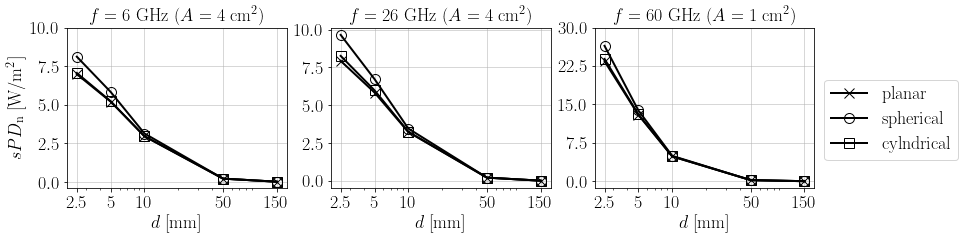

In [83]:
nrows = 1
ncols = 3
markerkwargs = {'lw': 2, 'mec': 'k', 'mfc': 'none', 'mew': 1, 'mfcalt': 'white', 'ms': 10}
fig_config(latex=True, scaler=1, text_size=18, nrows=nrows, ncols=ncols)
fig = plt.figure()
axs = fig.subplots(nrows, ncols)
for ci in range(ncols):
    axs[ci].plot(h, eval(f'sPDn_at{f[ci]}GHz')[:, 1], 'kx-', label='planar', **markerkwargs)
    axs[ci].plot(h, eval(f'sPDn_at{f[ci]}GHz')[:, 2], 'ko-', label='spherical', **markerkwargs)
    axs[ci].plot(h, eval(f'sPDn_at{f[ci]}GHz')[:, 3], 'ks-', label='cylndrical', **markerkwargs)
    axs[ci].set(title=f'$f = {f[ci]}$ GHz ($A = {A[ci]}$ cm$^2$)',
                xlabel='$d$ [mm]',
                xscale='log',
                xticks=h,
                xticklabels=h)
    axs[ci].grid()
axs[0].set(ylabel='$sPD_{\\text{n}}$ [W/m$^2$]')
axs[0].set(yticks=[0, 2.5, 5, 7.5, 10])
axs[1].set(yticks=[0, 2.5, 5, 7.5, 10])
axs[2].set(yticks=[0, 7.5, 15, 22.5, 30])
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.subplots_adjust(right=0.85);

#fname = os.path.join('figures', 'comparison_sPDn_abs')
#save_fig(fig, fname=fname)

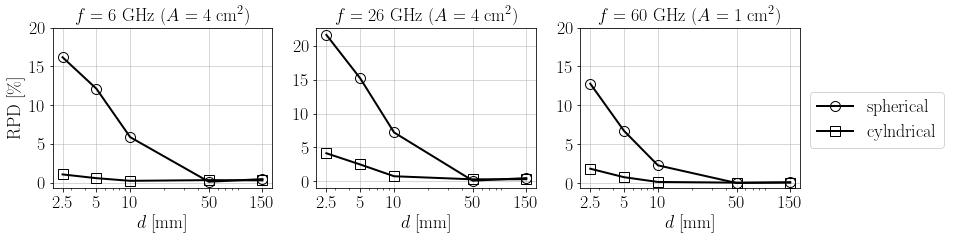

In [84]:
fig = plt.figure()
axs = fig.subplots(nrows, ncols)
for ci in range(ncols):
    axs[ci].plot(h, eval(f'sph_rpd_at{f[ci]}GHz'), 'ko-', label='spherical', **markerkwargs)
    axs[ci].plot(h, eval(f'cyl_rpd_at{f[ci]}GHz'), 'ks-', label='cylndrical', **markerkwargs)
    axs[ci].set(title=f'$f = {f[ci]}$ GHz ($A = {A[ci]}$ cm$^2$)',
                xlabel='$d$ [mm]',
                xscale='log',
                xticks=h,
                xticklabels=h,
                yticks=[0, 5, 10, 15, 20])
    axs[ci].grid()
axs[0].set(ylabel='RPD [\%]')
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.subplots_adjust(right=0.85);

#fname = os.path.join('figures', 'comparison_sPDn_rpd')
#save_fig(fig, fname=fname)